In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings

# Supress scientific notation/warning
pd.set_option('display.float_format', lambda x: '%.5f' % x)
warnings.filterwarnings("ignore")

## Load Data

#### Confirmed Global Cases

In [3]:
# Confirmed Global Cases
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
# Number of Death Cases - Global
deaths_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
# Number of recovered cases - Global
recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
# US Confirmed Cases
us_confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
# US Death Cases
us_death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
# Country-specific Data
country_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [49]:
# Rows and Columns
confirmed_df.shape

(266, 246)

In [50]:
# Head of data
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,NaN,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,...,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919
1,NaN,Albania,41.15330,20.16830,0,0,0,0,0,0,...,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226
2,NaN,Algeria,28.03390,1.65960,0,0,0,0,0,0,...,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623
3,NaN,Andorra,42.50630,1.52180,0,0,0,0,0,0,...,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564
4,NaN,Angola,-11.20270,17.87390,0,0,0,0,0,0,...,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901


In [51]:
# Transpose a sample of 3 records
confirmed_df.sample(3).T

,202,72,116
Province/State,NaN,Jiangsu,French Guiana
Country/Region,Peru,China,France
Lat,-9.19000,32.97110,3.93390
Long,-75.01520,119.45500,-53.12580
1/22/20,0,1,0
...,...,...,...
9/15/20,733860,665,9578
9/16/20,738020,665,9595
9/17/20,744400,665,9623
9/18/20,750098,665,9659


In [52]:
# Get stats for all columns
confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
count,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,...,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000
mean,21.07662,22.82944,2.08647,2.45865,3.53759,5.39098,7.96241,11.00376,20.96992,23.18045,...,105870.05263,107072.63910,108116.33459,109005.16165,110055.07519,111120.08271,112262.96617,113441.02632,114659.90226,115705.28571
std,24.90460,70.19133,27.27920,27.37786,34.08304,47.43493,66.28918,89.31376,219.18774,220.52498,...,555604.52562,562062.00147,567832.86046,572745.23769,577487.68501,583182.03524,589123.50855,595308.12768,601734.94548,607543.63117
min,-51.79630,-135.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,6.67758,-15.27768,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,466.00000,466.75000,467.25000,467.50000,467.50000,468.25000,468.25000,470.75000,470.75000,470.75000
50%,22.82085,20.92119,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3273.50000,3320.50000,3354.50000,3381.00000,3397.00000,3459.00000,3466.00000,3522.50000,3608.00000,3714.50000
75%,41.14320,77.91368,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,32343.75000,33452.00000,34724.75000,35407.50000,35539.00000,35802.00000,35994.00000,36395.25000,36708.25000,37312.75000
max,71.70690,178.06500,444.00000,444.00000,549.00000,761.00000,1058.00000,1423.00000,3554.00000,3554.00000,...,6396100.00000,6443652.00000,6485123.00000,6520122.00000,6553652.00000,6592342.00000,6630051.00000,6674411.00000,6723933.00000,6764970.00000


In [91]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/10/20', '9/11/20', '9/12/20', '9/13/20', '9/14/20', '9/15/20',
       '9/16/20', '9/17/20', '9/18/20', '9/19/20'],
      dtype='object', length=246)

In [99]:
confirmed_df.loc[:,'1/22/20'::5]

,1/22/20,1/27/20,2/1/20,2/6/20,2/11/20,2/16/20,2/21/20,2/26/20,3/2/20,3/7/20,...,8/4/20,8/9/20,8/14/20,8/19/20,8/24/20,8/29/20,9/3/20,9/8/20,9/13/20,9/18/20
0,0,0,0,0,0,0,0,1,1,1,...,36782,37054,37431,37599,38054,38143,38288,38520,38716,38883
1,0,0,0,0,0,0,0,0,0,0,...,5750,6411,7117,7812,8605,9279,9844,10553,11353,12073
2,0,0,0,0,0,0,0,1,3,17,...,32504,35160,37664,39847,41858,43781,45469,46938,48254,49413
3,0,0,0,0,0,0,0,0,1,1,...,939,955,989,1024,1060,1124,1199,1261,1344,1564
4,0,0,0,0,0,0,0,0,0,0,...,1344,1672,1852,2015,2222,2551,2805,3033,3388,3848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,16,...,12770,14208,15834,17606,19213,21668,24471,27363,30574,34401
262,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,0,0,0,0,0,0,0,0,0,0,...,1760,1804,1858,1892,1916,1946,1979,1994,2011,2024
264,0,0,0,0,0,0,0,0,0,0,...,6793,8085,9021,10218,11148,11902,12523,12952,13539,14022


<AxesSubplot:>

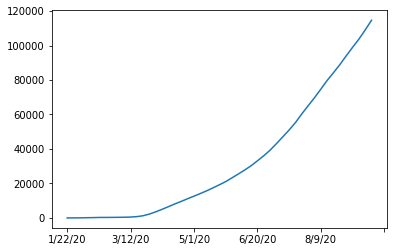

In [105]:
# Plot average number of cases only for data columns, show every 5 day column
confirmed_df.loc[:,'1/22/20'::5].describe().loc['mean'].plot()

Looking at this data, one can see the explosion in number of cases worldwide starting in March and up to mid september.

#### Number of Death Cases - Global

In [53]:
deaths_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [54]:
# Rows and Columns
deaths_df.shape

(266, 246)

In [55]:
# Head of data
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,NaN,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,...,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437
1,NaN,Albania,41.15330,20.16830,0,0,0,0,0,0,...,324,327,330,334,338,340,343,347,353,358
2,NaN,Algeria,28.03390,1.65960,0,0,0,0,0,0,...,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665
3,NaN,Andorra,42.50630,1.52180,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.87390,0,0,0,0,0,0,...,130,131,132,134,136,139,143,144,147,147


In [56]:
# Get stats for all columns
deaths_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
count,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,...,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000,266.00000
mean,21.07662,22.82944,0.06391,0.06767,0.09774,0.15789,0.21053,0.30827,0.49248,0.50000,...,3419.09398,3441.18797,3459.51504,3473.20677,3489.86090,3514.48120,3536.10902,3556.62030,3578.07143,3597.65414
std,24.90460,70.19133,1.04234,1.04391,1.47362,2.45362,3.18973,4.66085,7.66430,7.66479,...,16202.43051,16314.66859,16398.95092,16453.47111,16510.25960,16636.85063,16739.31167,16831.54377,16934.23421,17018.78998
min,-51.79630,-135.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,6.67758,-15.27768,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,5.00000,5.00000,5.00000,5.25000,5.25000,5.25000,5.25000,5.25000,5.25000,5.25000
50%,22.82085,20.92119,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,57.00000,57.00000,57.00000,57.00000,57.00000,58.00000,59.00000,60.50000,61.50000,62.50000
75%,41.14320,77.91368,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,576.75000,582.75000,588.00000,588.25000,611.50000,620.50000,620.50000,622.50000,629.00000,635.75000
max,71.70690,178.06500,17.00000,17.00000,24.00000,40.00000,52.00000,76.00000,125.00000,125.00000,...,191766.00000,192979.00000,193693.00000,194071.00000,194493.00000,195781.00000,196763.00000,197633.00000,198570.00000,199259.00000


<AxesSubplot:>

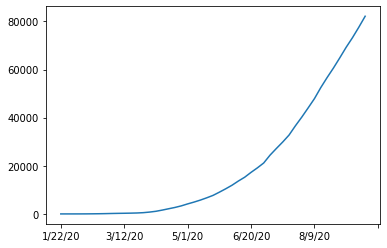

In [107]:
# Plot average number of deaths only for data columns, show every 5 day column
# Get stats for all columns
deaths_df.loc[:,'1/22/20'::5].describe().loc['mean'].plot()

The average number of deaths has also grown rapidly worldwide.

#### Number of recovered cases - Global

In [108]:
recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [109]:
# Rows and Columns
recovered_df.shape

(253, 246)

In [63]:
# Head of data
recovered_df .head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,NaN,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,...,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576
1,NaN,Albania,41.15330,20.16830,0,0,0,0,0,0,...,6346,6443,6494,6569,6615,6668,6733,6788,6831,6888
2,NaN,Algeria,28.03390,1.65960,0,0,0,0,0,0,...,33562,33723,33875,34037,34204,34385,34517,34675,34818,34923
3,NaN,Andorra,42.50630,1.52180,0,0,0,0,0,0,...,938,943,943,943,945,945,1054,1054,1164,1164
4,NaN,Angola,-11.20270,17.87390,0,0,0,0,0,0,...,1277,1288,1289,1301,1324,1332,1401,1405,1443,1445


In [110]:
# Get stats for all columns
recovered_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
count,253.00000,253.00000,253.00000,253.00000,253.00000,253.00000,253.00000,253.00000,253.00000,253.00000,...,253.00000,253.00000,253.00000,253.00000,253.00000,253.00000,253.00000,253.00000,253.00000,253.00000
mean,19.83514,27.99707,0.11067,0.11858,0.14229,0.15415,0.20553,0.24111,0.42292,0.49802,...,75068.70751,75951.77866,76834.61265,77568.91304,78475.85771,79363.55336,80268.52964,81135.11858,82130.39526,83070.35968
std,24.50455,67.35820,1.76034,1.76433,1.95472,2.02071,2.64973,2.85238,5.05986,5.56607,...,363909.65613,369082.30553,373853.12859,377453.61419,383122.75623,388665.56461,394165.24065,399323.26628,404589.29925,410616.50085
min,-51.79630,-106.34680,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,6.42806,-8.22450,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,335.00000,355.00000,368.00000,374.00000,374.00000,374.00000,374.00000,374.00000,374.00000,374.00000
50%,21.52176,23.88130,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1862.00000,1956.00000,1991.00000,1991.00000,2071.00000,2094.00000,2104.00000,2112.00000,2128.00000,2197.00000
75%,39.30540,85.24010,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,18837.00000,19788.00000,19979.00000,20082.00000,21206.00000,21536.00000,21752.00000,22662.00000,23160.00000,23364.00000
max,71.70690,178.06500,28.00000,28.00000,31.00000,32.00000,42.00000,45.00000,80.00000,88.00000,...,3657701.00000,3695158.00000,3723206.00000,3780107.00000,3859399.00000,3942360.00000,4025079.00000,4112551.00000,4208431.00000,4303043.00000


<AxesSubplot:>

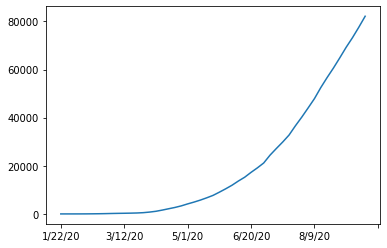

In [115]:
# Plot average recovered only for data columns, show every 5 day column
# Get stats for all columns
recovered_df.loc[:,'1/22/20'::5].describe().loc['mean'].plot()

Just as the number of cases and death has dramatically increased over time, the number of recovered patients as well.

#### US Confirmed Cases

In [65]:
us_confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

In [66]:
# Rows and Columns
us_confirmed_df.shape

(3340, 253)

In [67]:
# Head of data
us_confirmed_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,84001001,US,USA,840,1001.00000,Autauga,Alabama,US,32.53953,-86.64408,...,1413,1420,1432,1442,1447,1463,1619,1624,1664,1673
1,84001003,US,USA,840,1003.00000,Baldwin,Alabama,US,30.72775,-87.72207,...,4678,4722,4752,4781,4800,4812,5003,5021,5033,5047
2,84001005,US,USA,840,1005.00000,Barbour,Alabama,US,31.86826,-85.38713,...,618,618,620,622,626,629,809,809,824,830
3,84001007,US,USA,840,1007.00000,Bibb,Alabama,US,32.99642,-87.12511,...,566,574,576,578,581,580,612,617,619,628
4,84001009,US,USA,840,1009.00000,Blount,Alabama,US,33.98211,-86.56791,...,1099,1109,1114,1121,1128,1139,1487,1504,1527,1542


In [68]:
# Get stats for all columns
us_confirmed_df.describe()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
count,3340.00000,3340.00000,3330.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,...,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000
mean,83429579.94551,834.49162,33061.68468,36.70721,-88.60147,0.00030,0.00030,0.00060,0.00060,0.00150,...,1915.00000,1929.23713,1941.65359,1952.13234,1962.17126,1973.75509,1985.04521,1998.32665,2013.15359,2025.44012
std,4315344.96172,36.49806,18638.94079,9.06292,21.71898,0.01730,0.01730,0.02447,0.02447,0.03867,...,8196.37770,8231.92788,8262.91039,8291.79643,8319.20045,8351.39548,8380.36956,8418.62475,8454.17273,8490.04229
min,16.00000,16.00000,60.00000,-14.27100,-174.15960,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,84018108.50000,840.00000,19079.50000,33.89559,-97.79020,0.00000,0.00000,0.00000,0.00000,0.00000,...,88.75000,91.00000,92.00000,92.75000,94.00000,94.75000,96.00000,98.00000,101.00000,102.00000
50%,84029208.00000,840.00000,31014.00000,38.00234,-89.48671,0.00000,0.00000,0.00000,0.00000,0.00000,...,313.00000,316.50000,318.50000,320.00000,323.50000,324.50000,329.00000,332.50000,338.50000,345.00000
75%,84046119.50000,840.00000,47130.50000,41.57307,-82.31126,0.00000,0.00000,0.00000,0.00000,0.00000,...,1016.25000,1027.25000,1034.25000,1043.25000,1052.00000,1055.50000,1070.25000,1082.00000,1094.00000,1108.75000
max,84099999.00000,850.00000,99999.00000,69.31479,145.67390,1.00000,1.00000,1.00000,1.00000,1.00000,...,251024.00000,252066.00000,253176.00000,253985.00000,254656.00000,255049.00000,256148.00000,257271.00000,258516.00000,259817.00000


<AxesSubplot:>

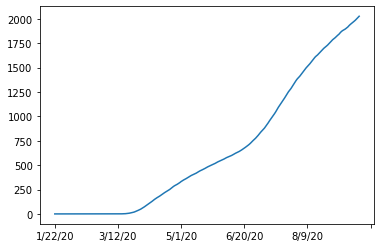

In [114]:
# Plot average cases in the US only for data columns
# Get stats for all columns
us_confirmed_df.loc[:,'1/22/20'::].describe().loc['mean'].plot()

#### US Death Cases

In [69]:
us_death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

In [70]:
# Rows and Columns
us_death_df.shape

(3340, 254)

In [71]:
# Head of data
us_death_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,84001001,US,USA,840,1001.00000,Autauga,Alabama,US,32.53953,-86.64408,...,23,23,23,23,23,23,24,24,24,24
1,84001003,US,USA,840,1003.00000,Baldwin,Alabama,US,30.72775,-87.72207,...,42,43,43,43,43,43,47,48,48,49
2,84001005,US,USA,840,1005.00000,Barbour,Alabama,US,31.86826,-85.38713,...,7,7,7,7,7,7,7,7,7,7
3,84001007,US,USA,840,1007.00000,Bibb,Alabama,US,32.99642,-87.12511,...,6,6,6,6,6,6,9,9,10,10
4,84001009,US,USA,840,1009.00000,Blount,Alabama,US,33.98211,-86.56791,...,12,12,13,13,13,13,13,13,14,14


In [72]:
# Get stats for all columns
us_death_df.describe()

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
count,3340.00000,3340.00000,3330.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,...,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000,3340.00000
mean,83429579.94551,834.49162,33061.68468,36.70721,-88.60147,99660.38533,0.00000,0.00000,0.00000,0.00000,...,57.41497,57.77814,57.99192,58.10509,58.23144,58.61707,58.91108,59.17156,59.45210,59.65838
std,4315344.96172,36.49806,18638.94079,9.06292,21.71898,324254.85206,0.00000,0.00000,0.00000,0.00000,...,307.70471,308.53277,309.16289,309.35830,309.68077,310.41362,311.10526,311.61989,312.22560,312.56796
min,16.00000,16.00000,60.00000,-14.27100,-174.15960,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,84018108.50000,840.00000,19079.50000,33.89559,-97.79020,9928.50000,0.00000,0.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
50%,84029208.00000,840.00000,31014.00000,38.00234,-89.48671,24911.00000,0.00000,0.00000,0.00000,0.00000,...,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000
75%,84046119.50000,840.00000,47130.50000,41.57307,-82.31126,64998.00000,0.00000,0.00000,0.00000,0.00000,...,22.00000,23.00000,23.00000,23.00000,23.00000,23.25000,24.00000,24.00000,24.00000,24.00000
max,84099999.00000,850.00000,99999.00000,69.31479,145.67390,10039107.00000,0.00000,0.00000,0.00000,0.00000,...,7299.00000,7299.00000,7306.00000,7306.00000,7306.00000,7309.00000,7311.00000,7312.00000,7314.00000,7315.00000


<AxesSubplot:>

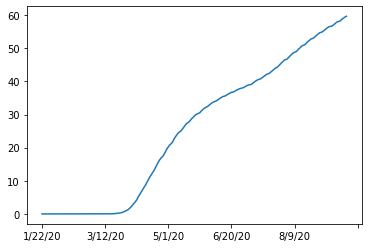

In [116]:
# Plot average cases in the US only for data columns
# Get stats for all columns
us_death_df.loc[:,'1/22/20'::].describe().loc['mean'].plot()

In [118]:
us_death_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '9/10/20', '9/11/20', '9/12/20', '9/13/20', '9/14/20', '9/15/20',
       '9/16/20', '9/17/20', '9/18/20', '9/19/20'],
      dtype='object', length=254)

The average number of daily deaths continue to increase in the US

#### Country-specific Data

In [73]:
country_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [74]:
# Rows and Columns
country_df.shape

(188, 14)

In [75]:
# Head of data
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2020-09-20 14:23:07,33.93911,67.70995,39044.00000,1441.00000,32576.00000,5027.00000,100.29711,nan,nan,3.69071,4,AFG
1,Albania,2020-09-20 14:23:07,41.15330,20.16830,12226.00000,358.00000,6888.00000,4980.00000,424.83842,nan,nan,2.92819,8,ALB
2,Algeria,2020-09-20 14:23:07,28.03390,1.65960,49623.00000,1665.00000,34923.00000,13035.00000,113.16264,nan,nan,3.35530,12,DZA
3,Andorra,2020-09-20 14:23:07,42.50630,1.52180,1564.00000,53.00000,1164.00000,347.00000,2024.20242,nan,nan,3.38875,20,AND
4,Angola,2020-09-20 14:23:07,-11.20270,17.87390,3901.00000,147.00000,1445.00000,2309.00000,11.86931,nan,nan,3.76826,24,AGO


In [76]:
# Get stats for all columns
country_df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
count,186.00000,186.00000,188.00000,188.00000,185.00000,188.00000,186.00000,0.00000,0.00000,188.00000,188.00000
mean,20.19597,17.56327,163969.30319,5095.41489,113986.96757,46709.06383,473.74702,nan,nan,2.73136,518.77128
std,23.77287,57.38000,718153.49078,20082.36995,477162.40375,304579.96446,673.60451,nan,nan,3.22006,963.04337
min,-40.90060,-102.55280,9.00000,0.00000,8.00000,0.00000,0.31613,nan,nan,0.00000,4.00000
25%,5.47006,-7.54223,2297.25000,40.75000,1327.00000,338.75000,44.67517,nan,nan,1.06713,207.00000
50%,18.85345,19.60115,10289.00000,215.50000,6927.00000,2046.00000,210.61789,nan,nan,2.02462,420.00000
75%,40.98089,44.69847,69218.50000,1208.75000,47271.00000,12439.25000,648.84808,nan,nan,3.15970,659.75000
max,64.96310,178.06500,6768997.00000,199299.00000,4303043.00000,3992251.00000,4282.31276,nan,nan,28.87463,9999.00000


<AxesSubplot:xlabel='Country_Region'>

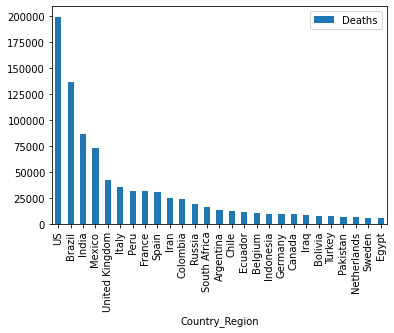

In [123]:
# Show number of deaths in countries that have had 5,000 deaths or more
country_df.query("Deaths>=5000").sort_values(by="Deaths",ascending=False).plot.bar(x='Country_Region',y='Deaths')

This data shows that the average number of deaths worldwide is about 5095 per country, the average number of confirmed is about 163,969, and the average recovered is 113,986.